Resultados esperados:
 - input: p_cores
 - output: t_tempo

In [9]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("data.csv")

In [58]:
df_teste = df[df['input'] == 2]

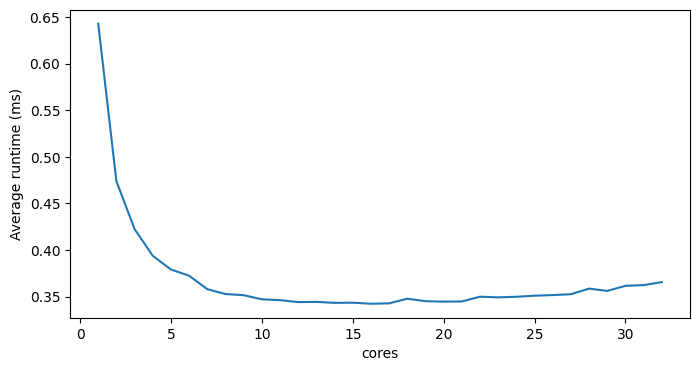

In [59]:
plt.figure(figsize=(8,4))
plt.xlabel("cores")
plt.ylabel("Average runtime (ms)")
plt.plot(df_teste['cores'], df_teste['average_runtime'])

In [5]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(16,8)))
model.add(tf.keras.layers.LSTM(2, activation="relu", dropout=0.2))
model.add(tf.keras.layers.Dense(8))
model.compile(optimizer='sgd', loss='mse')

model.summary()

model.fit(x, y, batch_size=32, epochs=10)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2)                 88        
                                                                 
 dense_2 (Dense)             (None, 8)                 24        
                                                                 
Total params: 112 (448.00 Byte)
Trainable params: 112 (448.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
